# Detectron2 Beginner's Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2! This is the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and make changes there. __DO NOT__ request access to this tutorial.


# Install detectron2

In [ ]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

In [1]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.8")   # please manually install torch 1.8 if Colab changes its default version

1.8.0+cu101 True


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image:

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

Loading config /usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


tensor([32, 29, 45, 35, 32, 18, 18, 41, 45, 18, 32, 32, 75, 29,  0, 46, 47, 45,
        46, 35, 19, 14, 35, 46, 45, 32, 47, 55, 46, 44, 65, 26, 32, 19, 32, 32,
        47, 64, 45, 14, 32, 29, 14, 32, 32,  3, 64, 29, 35, 43, 54, 35, 46, 47,
        35, 29, 54, 47, 32, 46, 19, 38, 47, 47, 18, 45, 29, 47, 45, 32, 77, 33,
        56, 32, 19, 31, 16, 61, 35, 46, 29, 18, 41, 32, 55, 49, 67, 32, 54, 41,
        29, 65, 14, 25, 64, 14, 76, 46, 67, 46], device='cuda:0')


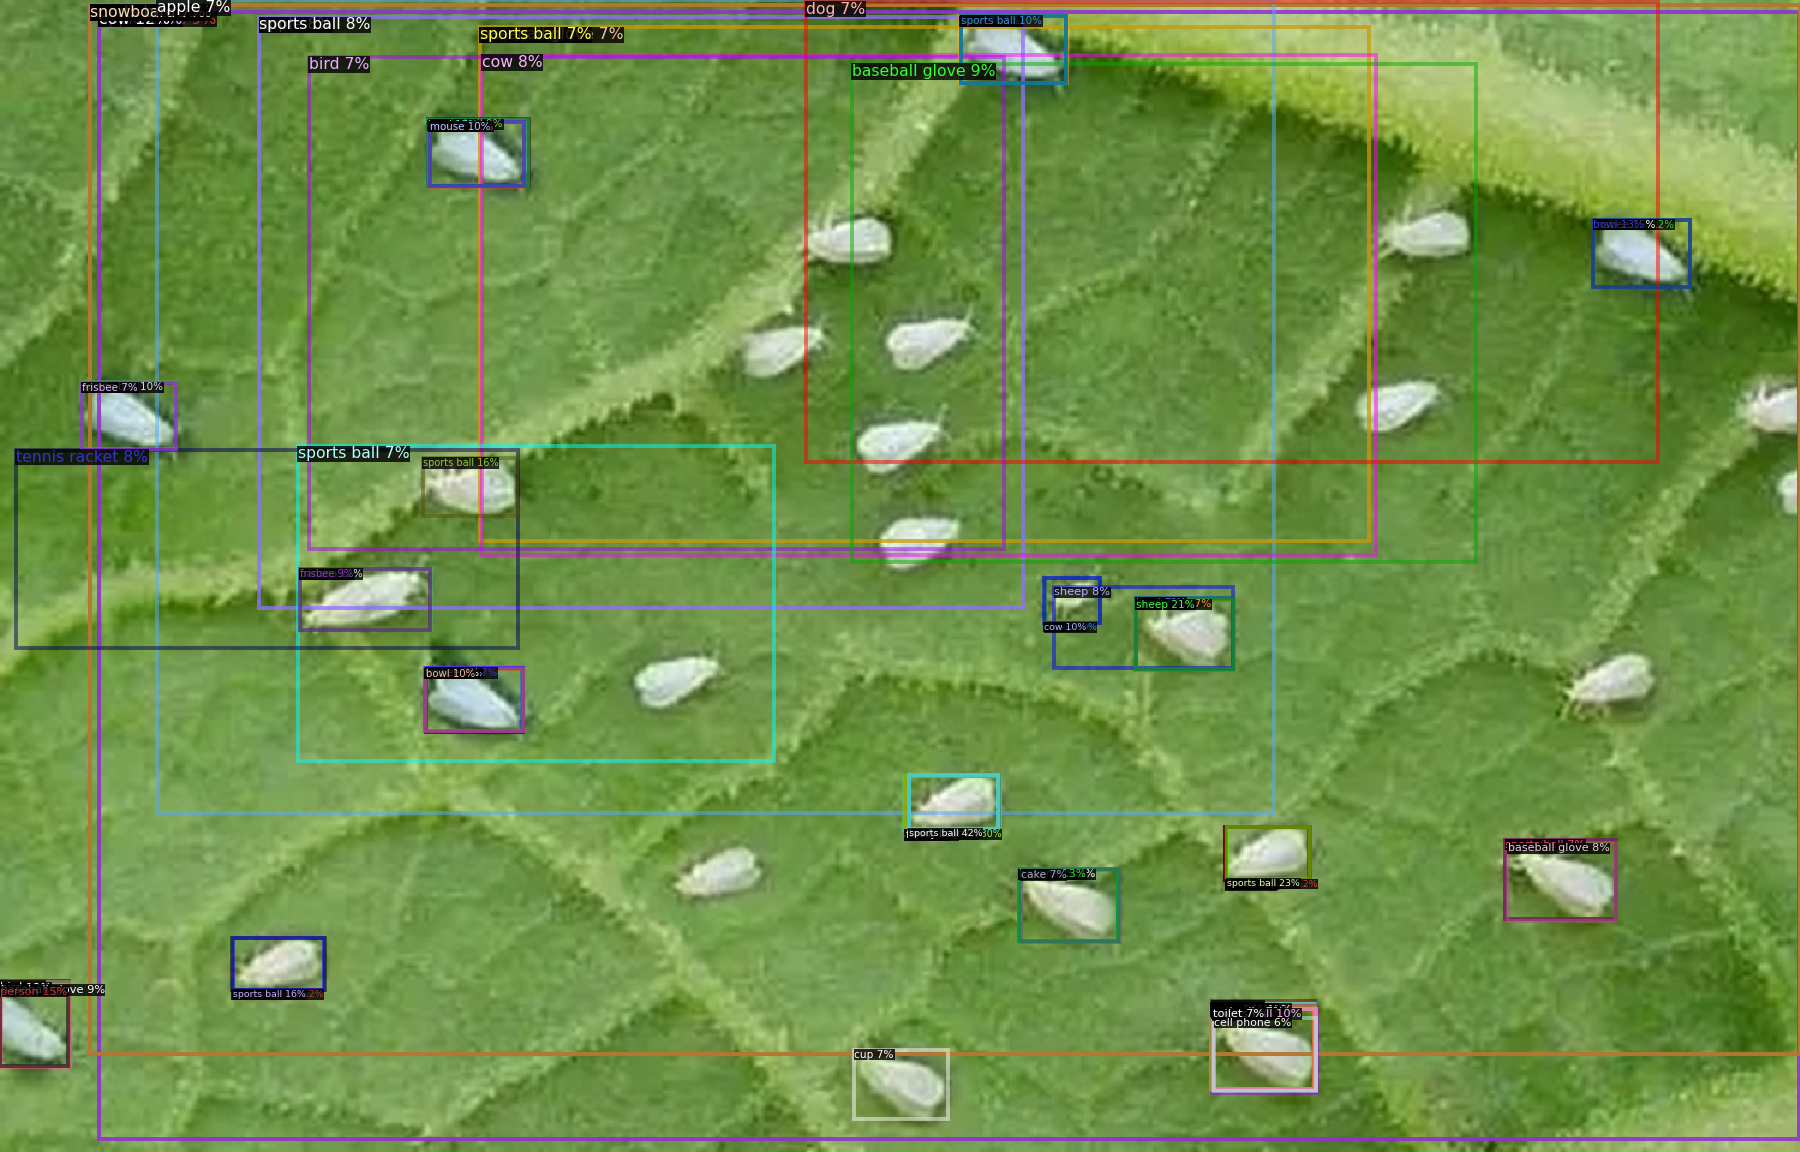

In [40]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

!wget https://l-1257408844.cos.ap-shanghai.myqcloud.com/444.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/fast_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.20 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/fast_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
print(outputs["instances"].pred_classes)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])